In [1]:
import pandas as pd
import numpy as np
import socket
import requests
import json

Get API and convert to DataFrame

In [2]:
df = pd.read_excel("./لاک بازدید- نمونه.xlsx")
df.head()

,نام و نام خانوادگی,شماره موبایل,بازدید,زمان تعامل(تانیه),آی پی,تاریخ,تگ ها,توضیحات
0,ناشناس,NaN,صفحه اصلی,0.000,43.130.7.6,1402/08/21 19:16:50,NaN,NaN
1,ناشناس,NaN,سالن اجرای صحنه ای 360,0.000,47.128.62.206,1402/08/21 19:08:41,NaN,نمونه کار شده سالن اجرای صحنه ای با کلیه امکان...
2,ناشناس,NaN,نمونه رستوران و کافه,4.687,89.199.191.219,1402/08/21 18:35:09,NaN,توضیحات کامل رستوران از جمله امکانات ، دسترسیه...
3,ناشناس,NaN,صفحه اصلی,31.997,89.199.191.219,1402/08/21 18:34:38,NaN,NaN
4,ناشناس,NaN,بیوگرافی حمیدرضا نصرالهی,0.000,24.199.108.69,1402/08/21 17:44:23,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   نام و نام خانوادگی  199 non-null    object 
 1   شماره موبایل        15 non-null     float64
 2   بازدید              199 non-null    object 
 3   زمان تعامل(تانیه)   199 non-null    float64
 4   آی پی               199 non-null    object 
 5   تاریخ               199 non-null    object 
 6   تگ ها               0 non-null      float64
 7   توضیحات             45 non-null     object 
dtypes: float64(3), object(5)
memory usage: 12.6+ KB


In [4]:
import scipy

In [5]:
class Recommenders:
    def __init__(self, data_addres: str):
        self.data_addres = data_addres

    def creat_df(self):
        df_api = pd.read_excel(str(self.data_addres))
        return df_api

    def user_name(self):
        user = self.creat_df()["نام و نام خانوادگی"]
        return user

    def user_timeline(self):
        time_line = self.creat_df()["زمان تعامل(تانیه)"]
        return time_line

    def user_name_time_matrix(self):
        # user_matrix = scipy.sparse.csr_matrix.toarray(self.user_name())
        time_matrix = scipy.sparse.csr_matrix.toarray(self.user_timeline())
        return time_matrix

In [6]:
r = Recommenders(r"E:\New folder\1\لاک بازدید- نمونه.xlsx")
r.user_name()

0      ناشناس
1      ناشناس
2      ناشناس
3      ناشناس
4      ناشناس
        ...  
194    ناشناس
195    ناشناس
196    ناشناس
197    ناشناس
198    ناشناس
Name: نام و نام خانوادگی, Length: 199, dtype: object

In [7]:
df.groupby("نام و نام خانوادگی")["زمان تعامل(تانیه)"].sum()

نام و نام خانوادگی
امیر نبی پور       7.236
سفردوست          780.119
ناشناس          1280.220
Name: زمان تعامل(تانیه), dtype: float64

In [8]:
Interaction_df = df[df["نام و نام خانوادگی"] == "سفردوست"][
    ["زمان تعامل(تانیه)", "بازدید"]
].sort_values(by="زمان تعامل(تانیه)", ascending=False)
Interaction_df

,زمان تعامل(تانیه),بازدید
63,317.413,صفحه اصلی
57,166.715,صفحه اصلی
49,104.895,صفحه اصلی
51,54.937,کارتهای E-Pass
58,54.438,صفحه اصلی
48,46.638,صفحه اصلی
54,16.989,جدیدترین موسیقی و کلیپ
52,6.883,مهدی احمدوند- زنگ بزنی
56,6.729,نمایشگاه ترکیه
50,4.482,قوانین و مقررات


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   نام و نام خانوادگی  199 non-null    object 
 1   شماره موبایل        15 non-null     float64
 2   بازدید              199 non-null    object 
 3   زمان تعامل(تانیه)   199 non-null    float64
 4   آی پی               199 non-null    object 
 5   تاریخ               199 non-null    object 
 6   تگ ها               0 non-null      float64
 7   توضیحات             45 non-null     object 
dtypes: float64(3), object(5)
memory usage: 12.6+ KB


In [10]:
name_df = pd.read_excel("./Book1.xlsx")
name_df.head()

,name
0,آداک2
1,آذین بردیا7
2,آرا بند2
3,آرا صلاحی2
4,آراد12


In [11]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    67 non-null     object
dtypes: object(1)
memory usage: 668.0+ bytes


In [12]:
name_split = Interaction_df["بازدید"].str.split("-")
name_split = name_split.apply(lambda x: [item.strip() for item in x])

In [13]:
import requests
from bs4 import BeautifulSoup

# آدرس وب‌سایت مورد نظر
url = "https://www.balmusic.ir/AllSingers/"

# درخواست برای دریافت محتوای صفحه وب
response = requests.get(url)

# بررسی وضعیت درخواست
if response.status_code == 200:
    # تبدیل محتوای HTML به شیء BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # پیدا کردن عناصر HTML مربوط به اسامی
    # names = soup.find_all("ul", class_="onechar")
    names = soup.find_all("ul", class_="onechar")

    # استخراج متن اسامی
    extracted_names = [name.text.strip() for name in names]
    names_string = " ".join([name for name in extracted_names if not name.isdigit()])
    import re

    # رشته ورودی
    input_string = str([name.text.strip() for name in names])

    # الگوی منظم برای جدا کردن اسامی و اعداد
    pattern = r"[^\d]+"

    # استفاده از عبارت منظم برای جدا کردن اسامی
    names = re.findall(pattern, input_string)

In [14]:
for i in names:
    if i == "اشوان":
        print(i)

اشوان


In [15]:
for i in name_split:

    print(i[0].strip())

صفحه اصلی
صفحه اصلی
صفحه اصلی
کارتهای E
صفحه اصلی
صفحه اصلی
جدیدترین موسیقی و کلیپ
مهدی احمدوند
نمایشگاه ترکیه
قوانین و مقررات
صفحه اصلی
اشوان
همایش
کنسرت


In [16]:
for i in name_split:
    if i[0] in names:
        print(i[0])
    elif i in names:
        print(i)

مهدی احمدوند
اشوان


In [17]:
names_string = "-".join(extracted_names)

# چاپ اسامی در یک خط با فاصله
print(names_string)

آداک2آذین بردیا7آرا بند2آرا صلاحی2آراد12آراد جاوید2آراز اسماعیلی2آراز موسوی3آران2آراکو5آرتا امین2آرتا بند2آرتان2آرسین رهان4آرش آردفروشان2آرش آوین2آرش ای پی31آرش بهزادی2آرش خان4آرش رمضانپور2آرش صبور4آرش لرد2آرش مستشیری4آرش نیکش2آرشا4آرشا رادین5آرشاویر6آرشاوین2آرمان آزمند7آرمان اسماعیلی10آرمان گرشاسبی7آرمین آراد6آرمین آقاجانپور4آرمین تارخ2آرمین زارعی10آرمین سپهر2آرمین شیرزاد2آرمین فریدونی3آرمین واحدی3آرمین وطنیان3آرن3آرون افشار19آروین2آروین صبوری2آروین صمیمی3آرکا2آرکان8آریا باند2آریامین2آریسان3آرین5آرین احمدی5آرین یاری7آریو4آژمان4آصف آریا16آلین2آمین5آنیل2آوات2آواج بند2آوار2آوان بند5آوه بند10آکس6آیدین3آیدین حسینلو3-ابراهیم جاویدی2ابراهیم جوادی2ابراهیم چاردولی2ابراهیم علیزاده2ابراهیم فلاح2ابراهیم هاشمی2ابوالفضل اسماعیلی3ابوالفضل جعفری3ابوالفضل زراعتکار2ابوالفضل شمس2ابوالفضل یوسفی2ابوذر طایفی2ابی صادقی2اتابک2احسان بداخشان2احسان بهوندی2احسان پایا2احسان پورجعفری2احسان تهرانچی2احسان خواجه امیری28احسان دریادل3احسان دلبندی2احسان سام2احسان صادقی2احسان عزیزی7احسان فخری2احسان قربان زاده4احسان معصوم

In [18]:
from bs4 import BeautifulSoup

html_content = """
<div class="heads">حرف آ</div>
<ul class="onechar">
    <li><div><a href="https://www.balmusic.ir/artist/آداک/">آداک</a><span>2</span></div></li>
    <li><div><a href="https://www.balmusic.ir/artist/آذین-بردیا/">آذین بردیا</a><span>7</span></div></li>
    <!-- بقیه اطلاعات اینجا -->
</ul>
"""

soup = BeautifulSoup(html_content, "html.parser")

# پیدا کردن تمام عناصر li درون المان ul با کلاس onechar
singers = soup.find("ul", class_="onechar").find_all("li")

# چاپ نام هر خواننده
for singer in singers:
    name = singer.find("a").text.strip()
    print(name)

آداک
آذین بردیا


In [19]:
test_name = "سهیل"

test_name in names

True

In [20]:
import data_scrap

title = data_scrap.date_scrape("https://www.6234.ir/")
title.head()

,Titles
0,30 بهمن 1402
1,30 بهمن 1402
2,24 اردیبهشت 1403
3,30 اردیبهشت 1403
4,25 اردیبهشت 1403


In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# آدرس وب‌سایت مورد نظر
url = "https://www.6234.ir/"

# درخواست برای دریافت محتوای صفحه وب
response = requests.get(url)

# بررسی وضعیت درخواست
if response.status_code == 200:
    # تبدیل محتوای HTML به شیء BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # پیدا کردن تگ h3 با کلاس "blog_post_title my-2"
    h3_tags = soup.find_all("h3", class_="blog_post_title my-2")

    # ایجاد لیستی برای نگهداری عناصر
    titles = []

    # چاپ متن موجود در هر تگ h3 با کلاس "blog_post_title my-2" و اضافه کردن آن به لیست titles
    for tag in h3_tags:
        if tag.text.strip():
            titles.append(tag.text.strip())

    # تبدیل لیست titles به یک دیتافریم پانداس
    df = pd.DataFrame({"Titles": titles})

    # چاپ دیتافریم
    print(df)
else:
    print(
        "مشکلی در دریافت اطلاعات از وب‌سایت رخ داده است. کد وضعیت:", response.status_code
    )

                                               Titles
0                     کنسرت تست ( بدون انتخاب صندلی )
1                       کنسرت تست ( با انتخاب صندلی )
2             کنگره بین‌المللی جامعه دندانپزشکی ایران
3               دهمین همایش سالانه بانکداری الکترونیک
4   نمایشگاه و جشنواره هوش مصنوعی در گردشگری و تفر...
5   نمایشگاه جشنواره هوش مصنوعی در تبلیغات و اطلاع...
6                      نمایشگاه تبلیغات در فضای مجازی
7                      نمایشگاه گردشگری در فضای مجازی
8                                     نمایش کمدی ژیلت
9                                    کنسرت نمایش کلنل
10                                        پارکینگ VIP
11                                        پارکینگ VIP
12                                        پارکینگ VIP
13                                مجموعه تفریحی اپارک
14                                   بازدید برج آزادی
15                                         تور باتومی
16                                      تور کوش آداسی
17                          

In [22]:
import data_scrap

data_scrap.location_scrape("https://www.6234.ir/")

,Titles
0,تهران مرکز همایشهای برج میلاد
1,تهران مرکز همایشهای برج میلاد
2,تهران ایرانمال
3,تهران مرکز همایش های بین المللی صدا وسیما
4,تهران مرکز همایشهای برج میلاد
5,تهران مرکز همایشهای برج میلاد
6,تهران مرکز همایشهای برج میلاد
7,تهران مرکز همایشهای برج میلاد
8,تهران تماشاخانه ایرانشهر
9,تهران سالن تالار وحدت


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# آدرس وب‌سایت مورد نظر
url = "https://www.6234.ir/"

# درخواست برای دریافت محتوای صفحه وب
response = requests.get(url)

# بررسی وضعیت درخواست
if response.status_code == 200:
    # تبدیل محتوای HTML به شیء BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # پیدا کردن تگ h3 با کلاس "blog_post_title my-2"
    h3_tags = soup.find_all("div", class_="blog_post_title my-2")

    # ایجاد لیستی برای نگهداری عناصر
    titles = []

    # چاپ متن موجود در هر تگ h3 با کلاس "blog_post_title my-2" و اضافه کردن آن به لیست titles
    for tag in h3_tags:
        if tag.text.strip():
            titles.append(tag.text.strip())

    # تبدیل لیست titles به یک دیتافریم پانداس
    df_location = pd.DataFrame({"Titles": titles})

    # چاپ دیتافریم
    print(df_location)
else:
    print(
        "مشکلی در دریافت اطلاعات از وب‌سایت رخ داده است. کد وضعیت:", response.status_code
    )

                                       Titles
0               تهران مرکز همایشهای برج میلاد
1               تهران مرکز همایشهای برج میلاد
2                              تهران ایرانمال
3   تهران مرکز همایش های بین المللی صدا وسیما
4               تهران مرکز همایشهای برج میلاد
5               تهران مرکز همایشهای برج میلاد
6               تهران مرکز همایشهای برج میلاد
7               تهران مرکز همایشهای برج میلاد
8                    تهران تماشاخانه ایرانشهر
9                       تهران سالن تالار وحدت
10                             تهران پالادیوم
11                             تهران ایرانمال
12                            مجتمع کوروش مال
13                         تهران مجموعه اپارک
14          تهران مجموه فرهنگی هنری برج آزادی
15                                    گرجستان
16                                      ترکیه
17                               امارات - دبی
18                                      ترکیه
19                                        قشم
20            نطنز بوتیک هتل کاروا

In [24]:
pd.merge(df, df_location, how="inner")

,Titles


In [25]:
pd.concat([df, df_location])

,Titles
0,کنسرت تست ( بدون انتخاب صندلی )
1,کنسرت تست ( با انتخاب صندلی )
2,کنگره بین‌المللی جامعه دندانپزشکی ایران
3,دهمین همایش سالانه بانکداری الکترونیک
4,نمایشگاه و جشنواره هوش مصنوعی در گردشگری و تفر...
...,...
30,تهران کاخ سعدآباد (ایوان عطار)
31,تهران سالن اریکه ایرانیان
32,تهران مرکز همایشهای برج میلاد
33,تهران مرکز همایشهای برج میلاد


In [26]:
type(df["Titles"])

pandas.core.series.Series

In [27]:
pd.concat([df["Titles"], df_location["Titles"]])

0                       کنسرت تست ( بدون انتخاب صندلی )
1                         کنسرت تست ( با انتخاب صندلی )
2               کنگره بین‌المللی جامعه دندانپزشکی ایران
3                 دهمین همایش سالانه بانکداری الکترونیک
4     نمایشگاه و جشنواره هوش مصنوعی در گردشگری و تفر...
                            ...                        
30                       تهران کاخ سعدآباد (ایوان عطار)
31                            تهران سالن اریکه ایرانیان
32                        تهران مرکز همایشهای برج میلاد
33                        تهران مرکز همایشهای برج میلاد
34                        تهران مرکز همایشهای برج میلاد
Name: Titles, Length: 71, dtype: object

In [28]:
merge_pd = pd.DataFrame({"Titles": df["Titles"], "Location": df_location["Titles"]})

In [29]:
merge_pd

,Titles,Location
0,کنسرت تست ( بدون انتخاب صندلی ),تهران مرکز همایشهای برج میلاد
1,کنسرت تست ( با انتخاب صندلی ),تهران مرکز همایشهای برج میلاد
2,کنگره بین‌المللی جامعه دندانپزشکی ایران,تهران ایرانمال
3,دهمین همایش سالانه بانکداری الکترونیک,تهران مرکز همایش های بین المللی صدا وسیما
4,نمایشگاه و جشنواره هوش مصنوعی در گردشگری و تفر...,تهران مرکز همایشهای برج میلاد
5,نمایشگاه جشنواره هوش مصنوعی در تبلیغات و اطلاع...,تهران مرکز همایشهای برج میلاد
6,نمایشگاه تبلیغات در فضای مجازی,تهران مرکز همایشهای برج میلاد
7,نمایشگاه گردشگری در فضای مجازی,تهران مرکز همایشهای برج میلاد
8,نمایش کمدی ژیلت,تهران تماشاخانه ایرانشهر
9,کنسرت نمایش کلنل,تهران سالن تالار وحدت


In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# آدرس وب‌سایت مورد نظر
url = "https://www.6234.ir/"

# درخواست برای دریافت محتوای صفحه وب
response = requests.get(url)

# بررسی وضعیت درخواست
if response.status_code == 200:
    # تبدیل محتوای HTML به شیء BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # پیدا کردن تگ h3 با کلاس "blog_post_title my-2"
    h3_tags = soup.find_all("div", class_="theater-date my-2")

    # ایجاد لیستی برای نگهداری عناصر
    titles = []

    # چاپ متن موجود در هر تگ h3 با کلاس "blog_post_title my-2" و اضافه کردن آن به لیست titles
    for tag in h3_tags:
        if tag.text.strip():
            titles.append(tag.text.strip())

    # تبدیل لیست titles به یک دیتافریم پانداس
    df_date = pd.DataFrame({"Titles": titles})

    # چاپ دیتافریم
    print(df_date)
else:
    print(
        "مشکلی در دریافت اطلاعات از وب‌سایت رخ داده است. کد وضعیت:", response.status_code
    )

              Titles
0       30 بهمن 1402
1       30 بهمن 1402
2   24 اردیبهشت 1403
3   30 اردیبهشت 1403
4   25 اردیبهشت 1403
5      15 خرداد 1403
6       9 اسفند 1402
7     1 فروردین 1403
8     1 فروردین 1403
9     1 فروردین 1403
10      6 اسفند 1402
11     16 اسفند 1402
12     29 اسفند 1402
13     28 اسفند 1402
14     27 اسفند 1402
15     28 اسفند 1402
16     29 اسفند 1402
17      20 بهمن 1402
18     28 اسفند 1402
19     28 اسفند 1402
20    1 فروردین 1403
21    1 فروردین 1403
22    1 فروردین 1403
23    1 فروردین 1403
24    1 فروردین 1403


In [31]:
merge_pd

,Titles,Location
0,کنسرت تست ( بدون انتخاب صندلی ),تهران مرکز همایشهای برج میلاد
1,کنسرت تست ( با انتخاب صندلی ),تهران مرکز همایشهای برج میلاد
2,کنگره بین‌المللی جامعه دندانپزشکی ایران,تهران ایرانمال
3,دهمین همایش سالانه بانکداری الکترونیک,تهران مرکز همایش های بین المللی صدا وسیما
4,نمایشگاه و جشنواره هوش مصنوعی در گردشگری و تفر...,تهران مرکز همایشهای برج میلاد
5,نمایشگاه جشنواره هوش مصنوعی در تبلیغات و اطلاع...,تهران مرکز همایشهای برج میلاد
6,نمایشگاه تبلیغات در فضای مجازی,تهران مرکز همایشهای برج میلاد
7,نمایشگاه گردشگری در فضای مجازی,تهران مرکز همایشهای برج میلاد
8,نمایش کمدی ژیلت,تهران تماشاخانه ایرانشهر
9,کنسرت نمایش کلنل,تهران سالن تالار وحدت


In [32]:
merge_pd = pd.DataFrame(
    {
        "Titles": df["Titles"],
        "Location": df_location["Titles"],
        "Date": df_date["Titles"],
    }
)

In [33]:
merge_pd

,Titles,Location,Date
0,کنسرت تست ( بدون انتخاب صندلی ),تهران مرکز همایشهای برج میلاد,30 بهمن 1402
1,کنسرت تست ( با انتخاب صندلی ),تهران مرکز همایشهای برج میلاد,30 بهمن 1402
2,کنگره بین‌المللی جامعه دندانپزشکی ایران,تهران ایرانمال,24 اردیبهشت 1403
3,دهمین همایش سالانه بانکداری الکترونیک,تهران مرکز همایش های بین المللی صدا وسیما,30 اردیبهشت 1403
4,نمایشگاه و جشنواره هوش مصنوعی در گردشگری و تفر...,تهران مرکز همایشهای برج میلاد,25 اردیبهشت 1403
5,نمایشگاه جشنواره هوش مصنوعی در تبلیغات و اطلاع...,تهران مرکز همایشهای برج میلاد,15 خرداد 1403
6,نمایشگاه تبلیغات در فضای مجازی,تهران مرکز همایشهای برج میلاد,9 اسفند 1402
7,نمایشگاه گردشگری در فضای مجازی,تهران مرکز همایشهای برج میلاد,1 فروردین 1403
8,نمایش کمدی ژیلت,تهران تماشاخانه ایرانشهر,1 فروردین 1403
9,کنسرت نمایش کلنل,تهران سالن تالار وحدت,1 فروردین 1403


In [34]:
itraction = pd.read_excel(r"E:\New folder\1\لاک بازدید- نمونه.xlsx")
itraction.head()

,نام و نام خانوادگی,شماره موبایل,بازدید,زمان تعامل(تانیه),آی پی,تاریخ,تگ ها,توضیحات
0,ناشناس,NaN,صفحه اصلی,0.000,43.130.7.6,1402/08/21 19:16:50,NaN,NaN
1,ناشناس,NaN,سالن اجرای صحنه ای 360,0.000,47.128.62.206,1402/08/21 19:08:41,NaN,نمونه کار شده سالن اجرای صحنه ای با کلیه امکان...
2,ناشناس,NaN,نمونه رستوران و کافه,4.687,89.199.191.219,1402/08/21 18:35:09,NaN,توضیحات کامل رستوران از جمله امکانات ، دسترسیه...
3,ناشناس,NaN,صفحه اصلی,31.997,89.199.191.219,1402/08/21 18:34:38,NaN,NaN
4,ناشناس,NaN,بیوگرافی حمیدرضا نصرالهی,0.000,24.199.108.69,1402/08/21 17:44:23,NaN,NaN


In [55]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.sparse import csr_matrix

In [56]:
ohe = OneHotEncoder()
le = LabelEncoder()

le.fit_transform(itraction["نام و نام خانوادگی"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [50]:
itraction["نام و نام خانوادگی"].to_numpy().reshape(-1, 1).getnn

199

In [57]:
itraction["userId"] = le.fit_transform(itraction["نام و نام خانوادگی"])

In [61]:
def creat_X(df):
    M = df["userId"].nunique()
    N = df["بازدید"].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["بازدید"]), list(range(N))))

    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["بازدید"])))

    user_index = [user_mapper[i] for i in df["userId"]]
    movie_indx = [movie_mapper[i] for i in df["بازدید"]]

    X = csr_matrix((df["زمان تعامل(تانیه)"], (user_index, movie_indx)), shape=(M, N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper


X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = creat_X(itraction)

In [63]:
n_rating_per_user = X.getnnz(axis=1)
len(n_rating_per_user)

3

In [64]:
n_rating_per_movie = X.getnnz(axis=0)
len(n_rating_per_movie)

33

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\asgari.soheil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asgari.soheil\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


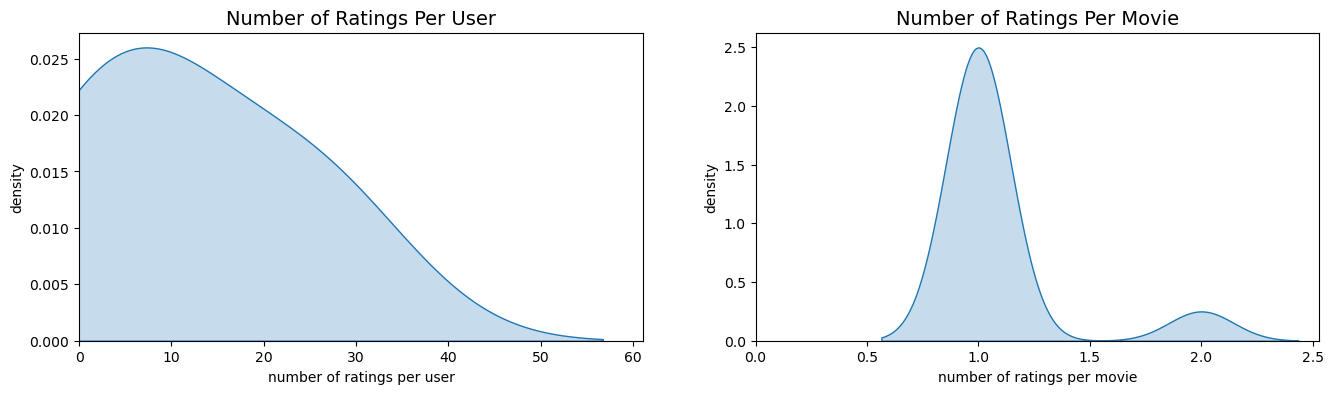

In [66]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(n_rating_per_user, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1, 2, 2)
sns.kdeplot(n_rating_per_movie, fill=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

In [67]:
from sklearn.neighbors import NearestNeighbors


def find_similar_movies(
    mvoie_id, X, movie_mapper, movie_inv_mapper, k, metrics="cosine"
):
    """
    Finds k-nearest neighbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations

    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbours_ids = []

    movie_ind = movie_mapper[mvoie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1, -1)
    # use k+1 since kNN output includes the movieId of interest
    knn = NearestNeighbors(n_neighbors=k + 1, algorithm="brute", metric=metrics)
    knn.fit(X)
    neighbours = knn.kneighbors(movie_vec, return_distance=False)
    for i in range(0, k):
        n = neighbours.item(i)
        neighbours_ids.append(movie_inv_mapper[n])
    neighbours_ids.pop(0)
    return neighbours_ids

In [68]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

KeyError: 1

In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# آدرس وب‌سایت مورد نظر
url = "https://www.6234.ir/"

# درخواست برای دریافت محتوای صفحه وب
response = requests.get(url)

# بررسی وضعیت درخواست
if response.status_code == 200:
    # تبدیل محتوای HTML به شیء BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # پیدا کردن تگ h3 با کلاس "blog_post_title my-2"
    h3_tags = soup.find_all("div", class_="i i-music")

    # ایجاد لیستی برای نگهداری عناصر
    titles = []

    # چاپ متن موجود در هر تگ h3 با کلاس "blog_post_title my-2" و اضافه کردن آن به لیست titles
    for tag in h3_tags:
        if tag.text.strip():
            titles.append(tag.text.strip())

    # تبدیل لیست titles به یک دیتافریم پانداس
    df_titles = pd.DataFrame({"Titles": titles})

    # چاپ دیتافریم
    print(df_titles)
else:
    print(
        "مشکلی در دریافت اطلاعات از وب‌سایت رخ داده است. کد وضعیت:", response.status_code
    )

Empty DataFrame
Columns: [Titles]
Index: []
